# Introduccion

A lo largo del tiempo el estado de Guanajuato se ha convertido en uno de los mas violentos del pais

## Informacion del dataset

| Id        | Nombre   | Descripcion |
|--------------|-----------|------------|
|1002000030| Defunciones generales| Esta información se actualiza anualmente       |
|1002000031|Defunciones generales hombres|La información se presenta por lugar de residencia habitual del fallecido|
|1002000032|Defunciones generales mujeres|La información se presenta por lugar de residencia habitual del fallecido|
|1002000033|Defunciones generales de sexo no especificado|La información se presenta por lugar de residencia habitual del fallecido|
|1002000034|Defunciones de menores de un año|La información se presenta por lugar de residencia habitual del fallecido|
|1002000035|Defunciones de menores de un año hombres|La información se presenta por lugar de residencia habitual del fallecido|
|1002000036|Defunciones de menores de un año mujeres|La información se presenta por lugar de residencia habitual del fallecido|
|1002000037|Defunciones de menores de un año de sexo no especificado|La información se presenta por lugar de residencia habitual del fallecido|
|6200240338|Suicidios registrados|Defunciones registradas por entidad federativa de residencia habitual de la persona fallecida|
|6200240468|Índice de sobremortalidad masculina|Es la relación de las defunciones masculinas por cada cien defunciones femeninas|
|6200240526|Porcentaje de muertes por suicidio con respecto al total de muertes violentas|El cálculo se realizó con base en las defunciones generales de residencia habitual de la persona fallecida|



## Limpieza de datos

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
mortalidad = pd.read_csv('data/mortalidad.csv')

mortalidad.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1994,20798.0,Defunciones
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1995,21482.0,Defunciones
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1996,21469.0,Defunciones
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1997,21492.0,Defunciones
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1998,21759.0,Defunciones


In [11]:
mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cve_entidad     10644 non-null  int64  
 1   desc_entidad    10644 non-null  object 
 2   cve_municipio   10644 non-null  int64  
 3   desc_municipio  10644 non-null  object 
 4   id_indicador    10644 non-null  int64  
 5   indicador       10644 non-null  object 
 6   año             10644 non-null  int64  
 7   valor           10644 non-null  float64
 8   unidad_medida   10644 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 748.5+ KB


In [12]:
mortalidad['indicador'].value_counts()

Defunciones generales                                                            1344
Defunciones generales hombres                                                    1344
Defunciones generales mujeres                                                    1344
Defunciones generales de sexo no especificado                                    1344
Defunciones de menores de un año                                                 1296
Defunciones de menores de un año hombres                                         1296
Defunciones de menores de un año mujeres                                         1296
Defunciones de menores de un año de sexo no especificado                         1296
Suicidios registrados                                                              28
Índice de sobremortalidad masculina                                                28
Porcentaje de muertes por suicidio con respecto al total de muertes violentas      28
Name: indicador, dtype: int64

In [13]:
mortalidad['desc_municipio'].value_counts()

Estatal                                              304
Abasolo                                              220
Romita                                               220
Salamanca                                            220
Salvatierra                                          220
San Diego de la Unión                                220
San Felipe                                           220
San Francisco del Rincón                             220
San José Iturbide                                    220
San Luis de la Paz                                   220
Santa Catarina                                       220
Santa Cruz de Juventino Rosas                        220
Santiago Maravatío                                   220
Silao de la Victoria                                 220
Tarandacuao                                          220
Tarimoro                                             220
Tierra Blanca                                        220
Uriangato                      

Podemos observar que el dataset esta dividido por defunciones en todo el estado, por municipio y lugares no especificado para esto trabajamos con 3 dataframes generales(estado,municipio,no_especificado)

In [18]:
m_estado = mortalidad[mortalidad['desc_municipio'] == 'Estatal']
m_municipios = mortalidad[(mortalidad['desc_municipio'] != 'Estatal') & (mortalidad['desc_municipio'] != 'No especificado')]
m_no_especificado = mortalidad[mortalidad['desc_municipio'] == 'No especificado']

### Analisis del estado de Guanajuato en general


In [25]:
m_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cve_entidad     304 non-null    int64  
 1   desc_entidad    304 non-null    object 
 2   cve_municipio   304 non-null    int64  
 3   desc_municipio  304 non-null    object 
 4   id_indicador    304 non-null    int64  
 5   indicador       304 non-null    object 
 6   año             304 non-null    int64  
 7   valor           304 non-null    float64
 8   unidad_medida   304 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 23.8+ KB


Considerando defunciones y porcentajes dividimos el dataframe

In [26]:
m_estado['unidad_medida'].value_counts()

Defunciones    248
Porcentaje      56
Name: unidad_medida, dtype: int64

In [27]:
m_estado_def = m_estado[m_estado['unidad_medida'] == 'Defunciones']
m_estado_por = m_estado[m_estado['unidad_medida'] == 'Porcentaje']

#### Analisis de defunciones en el estado

In [30]:
m_estado_def['valor'].describe()

count      248.000000
mean      6702.185484
std       9985.790077
min          0.000000
25%        171.750000
50%       1127.500000
75%      11786.500000
max      56279.000000
Name: valor, dtype: float64

In [40]:
m_estado_def.columns

Index(['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio',
       'id_indicador', 'indicador', 'año', 'valor', 'unidad_medida'],
      dtype='object')

### Visualizando los datos

In [43]:
m_estado_def

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1994,20798.0,Defunciones
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1995,21482.0,Defunciones
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1996,21469.0,Defunciones
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1997,21492.0,Defunciones
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1998,21759.0,Defunciones
...,...,...,...,...,...,...,...,...,...
243,11,Guanajuato,0,Estatal,6200240338,Suicidios registrados,2017,494.0,Defunciones
244,11,Guanajuato,0,Estatal,6200240338,Suicidios registrados,2018,504.0,Defunciones
245,11,Guanajuato,0,Estatal,6200240338,Suicidios registrados,2019,493.0,Defunciones
246,11,Guanajuato,0,Estatal,6200240338,Suicidios registrados,2020,501.0,Defunciones


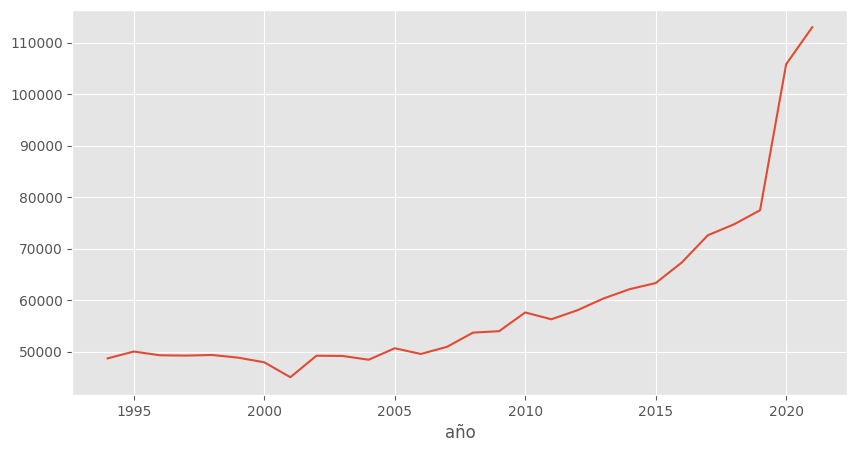

In [52]:
defunciones_tiempo = m_estado_def.groupby('año')['valor'].sum()

defunciones_tiempo.plot(kind='line',figsize=(10,5))

plt.show()

In [56]:
categoria_total = m_estado_def.groupby('indicador')['valor'].sum()

categoria_total

indicador
Defunciones de menores de un año                             51294.0
Defunciones de menores de un año de sexo no especificado       111.0
Defunciones de menores de un año hombres                     29025.0
Defunciones de menores de un año mujeres                     22158.0
Defunciones generales                                       775725.0
Defunciones generales de sexo no especificado                  187.0
Defunciones generales hombres                               431162.0
Defunciones generales mujeres                               344376.0
Suicidios registrados                                         8104.0
Name: valor, dtype: float64

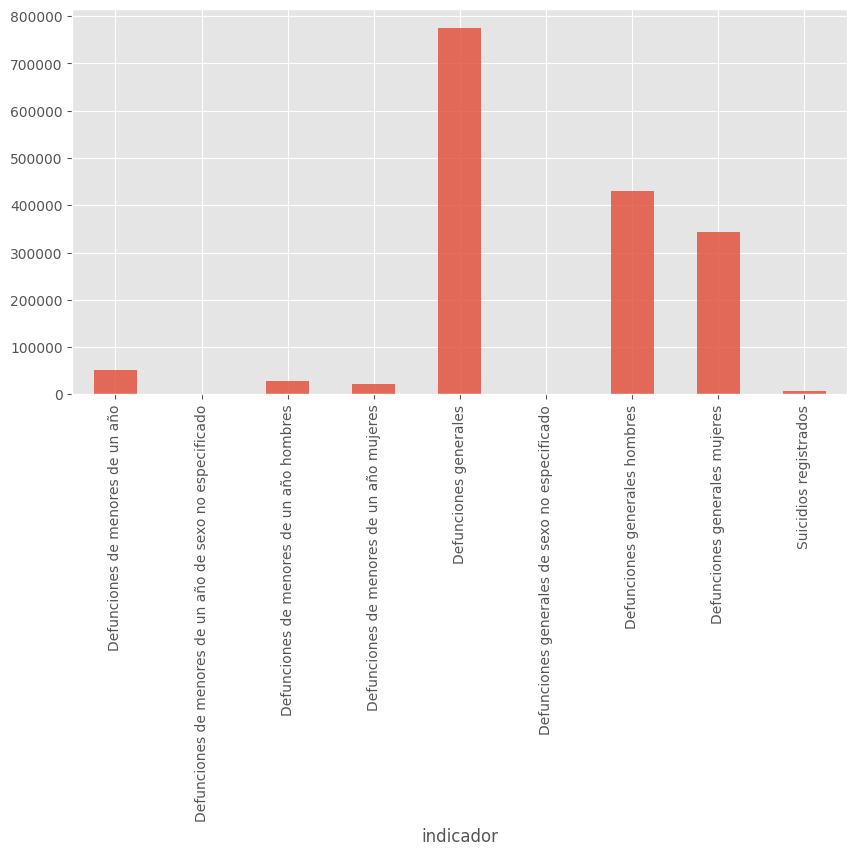

In [66]:
categoria_total.plot(kind='bar',alpha=0.80,rot=90,figsize=(10,5))

plt.show()